In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import json

plt.style.use('seaborn-v0_8-bright')
plt.style.use('ggplot')

o_df = pd.read_csv("tmdb_5000_movies.csv")

print(o_df.head(5))

C:\Users\rhyth\AppData\Local\Temp\ipykernel_44560\3891864206.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [3]:
o_df.drop(['homepage', 'tagline'], axis=1, inplace=True)
o_df.dropna(inplace=True)

In [4]:
columns_to_remove_zero = ['runtime', 'vote_average','vote_count','popularity']  

for col in columns_to_remove_zero:
    o_df = o_df[o_df[col] != 0]

In [5]:
df = o_df

In [6]:
netflix = pd.read_csv("ott/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Extract the columns you want to compare
column1_df1 = df['title'].str.lower()
column2_df2 = netflix['title'].str.lower()
# Find common entries using isin() and boolean indexing
common_entries_mask = column1_df1.isin(column2_df2)
common_entries = column1_df1[common_entries_mask]
simple_av_net = len(common_entries)
print("Simple Availability", simple_av_net)

Simple Availability 784


In [8]:
popularity_masked = df['popularity']
attribute_values = popularity_masked[common_entries_mask]
pop_ava_score_net = attribute_values.sum()
print("Popularity Availability Score", pop_ava_score_net)

Popularity Availability Score 22869.797002


In [9]:
hotstar = pd.read_csv("ott/hotstar.csv")
hotstar.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000087439,Sambha - Aajcha Chawa,A young man sets off on a mission to clean up ...,Action,2012,U/A 16+,141.0,NaN,NaN,movie
1,1260023113,Cars Toon: Mater And The Ghostlight,Mater is haunted by a mysterious blue light th...,Animation,2006,U,7.0,NaN,NaN,movie
2,1260103188,Kanmani Rambo Khatija,"Unlucky since birth, Rambo finds hope when he ...",Romance,2022,U/A 16+,157.0,NaN,NaN,movie
3,1260126754,Butterfly,While trying to rescue her sister's kids from ...,Thriller,2022,U/A 16+,136.0,NaN,NaN,movie
4,1260018228,Sister Act,"Rene, a lounge singer, decides to stay at a Ch...",Comedy,1992,U/A 7+,100.0,NaN,NaN,movie


In [15]:
# Extract the columns you want to compare
column1_df1 = df['title'].str.lower()
column2_df2 = hotstar['title'].str.lower()

# Find common entries using isin() and boolean indexing
common_entries_mask = column1_df1.isin(column2_df2)
common_entries = column1_df1[common_entries_mask]
simple_av_hotstar = len(common_entries)
print("Simple Availability", simple_av_hotstar)

Simple Availability 284


In [14]:
popularity_masked = df['popularity']
attribute_values = popularity_masked[common_entries_mask]
pop_ava_score_hot = attribute_values.sum()
print("Popularity Availability Score", pop_ava_score_hot)

Popularity Availability Score 14048.223948


In [16]:
amazon = pd.read_csv("ott/amazon_prime_titles.csv")
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [18]:
# Extract the columns you want to compare
column1_df1 = df['title'].str.lower()
column2_df2 = amazon['title'].str.lower()

# Find common entries using isin() and boolean indexing
common_entries_mask = column1_df1.isin(column2_df2)
common_entries = column1_df1[common_entries_mask]
simple_av_amazon = len(common_entries)
print("Simple Availability", simple_av_amazon)

Simple Availability 410


In [19]:
popularity_masked = df['popularity']
attribute_values = popularity_masked[common_entries_mask]
pop_ava_score_amazon = attribute_values.sum()
print("Popularity Availability Score", pop_ava_score_amazon)

Popularity Availability Score 7456.656226


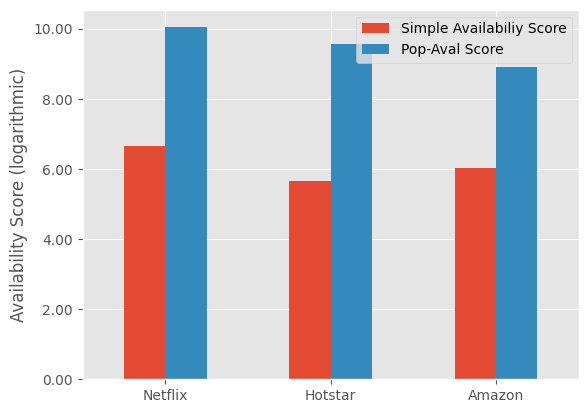

In [20]:
from matplotlib import ticker
import matplotlib.pyplot as plt

v1 = [simple_av_net, simple_av_hotstar, simple_av_amazon]
v1 = np.log(v1)
v2 = [pop_ava_score_net, pop_ava_score_hot, pop_ava_score_amazon]
v2 = np.log(v2)

plt_df = pd.DataFrame(np.array([v1, v2]).T, index=["Netflix", "Hotstar", "Amazon"])

plt_df.head()

plt_df.plot(kind='bar')

plt.ylabel('Availability Score (logarithmic)')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.legend(["Simple Availabiliy Score", "Pop-Aval Score"])
plt.gca().xaxis.set_tick_params(rotation=0)
